In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
def readfile(pred_data):
    data = pd.read_csv(pred_data).T.to_numpy()
    f1 = np.array([f1_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    f1_macro = np.array([f1_score(data[0], data[i],average='macro') for i in range(1,round_num+1)]).T
    precision = np.array([precision_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    recall = np.array([recall_score(data[0], data[i],average=None) for i in range(1,round_num+1)]).T
    accuracy = np.array([accuracy_score(data[0], data[i]) for i in range(1,round_num+1)])
    return f1, precision, recall, accuracy, f1_macro

def plotfile(f1, precision, recall, accuracy, cell):
    
    x = [x*10 for x in range(round_num)]
    fig, ax = plt.subplots(1,3, figsize=(15,4.5))
    [ax[0].plot(x, f1[i], label=f'label{i}') for i in range(3)]
    [ax[1].plot(x, precision[i], label=f'label{i}') for i in range(3)]
    [ax[2].plot(x, recall[i], label=f'label{i}') for i in range(3)]
    ax[0].set_ylabel('f1', size=font)
    ax[1].set_ylabel('precision', size=font)
    ax[2].set_ylabel('recall', size=font)
    [ax[i].set_xlabel(f'{cell}: Number of Finetunning Samples', size=font) for i in range(3)]
    plt.legend(bbox_to_anchor=(1.3, 0.6))
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].plot(x, accuracy, label='accuracy')
    ax[0].set_ylabel('accuracy', size=font)
    ax[1].plot(x, np.mean(f1, axis=0), label='f1')
    ax[1].set_ylabel('f1', size=font)
    ax[2].plot(x, np.mean(precision, axis=0), label='precision')
    ax[2].set_ylabel('precision', size=font)
    ax[3].plot(x, np.mean(recall, axis=0), label='recall')
    ax[3].set_ylabel('recall', size=font)
    
    # [ax[i].set_xlabel(f'{cell}:Number of Finetunning Samples', size=font) for i in range(4)]
    ax[1].set_xlabel(f'{cell}:Number of Finetunning Samples', size=font)
    # plt.legend(bbox_to_anchor=(1.0, 0.6))
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
   

In [3]:
font = 14
rootdir = '/egr/research-aidd/menghan1/AnchorDrug/ActiveLearning_one_cellline'
# expname = 'hannewnet_1000_256_64_imbalance_pretrain_balance_all_data'
expname = 'all_data_bs'
# expname = 'all_data_batch64_epoch20_balance'
files = [f for f in os.listdir(f'{rootdir}/preds/{expname}') if 'RandomSampling_10' in f]
# files = list(set([f[:-5] for f in files]))
files

['LINCS_PC3_RandomSampling_10_0_957_20240731_183253__0.csv',
 'LINCS_A549_RandomSampling_10_0_642_20240731_183253__2.csv',
 'LINCS_MCF7_RandomSampling_10_0_810_20240731_183253__2.csv',
 'LINCS_PC3_RandomSampling_10_0_957_20240731_183253__1.csv',
 'LINCS_MCF7_RandomSampling_10_0_810_20240731_183253__1.csv',
 'LINCS_A549_RandomSampling_10_0_642_20240731_183253__0.csv',
 'LINCS_PC3_RandomSampling_10_0_957_20240731_183253__2.csv',
 'LINCS_A549_RandomSampling_10_0_642_20240731_183253__1.csv',
 'LINCS_MCF7_RandomSampling_10_0_810_20240731_183253__0.csv']

## MCF7

LINCS_MCF7_RandomSampling_10_0_810_20240731_183253__2.csv
LINCS_MCF7_RandomSampling_10_0_810_20240731_183253__1.csv
LINCS_MCF7_RandomSampling_10_0_810_20240731_183253__0.csv


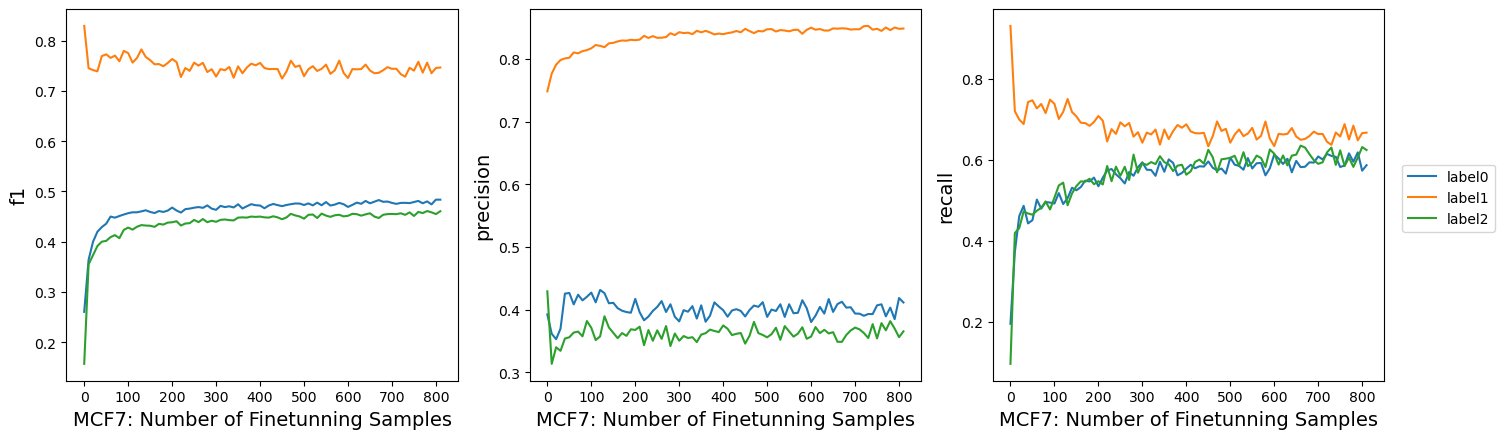

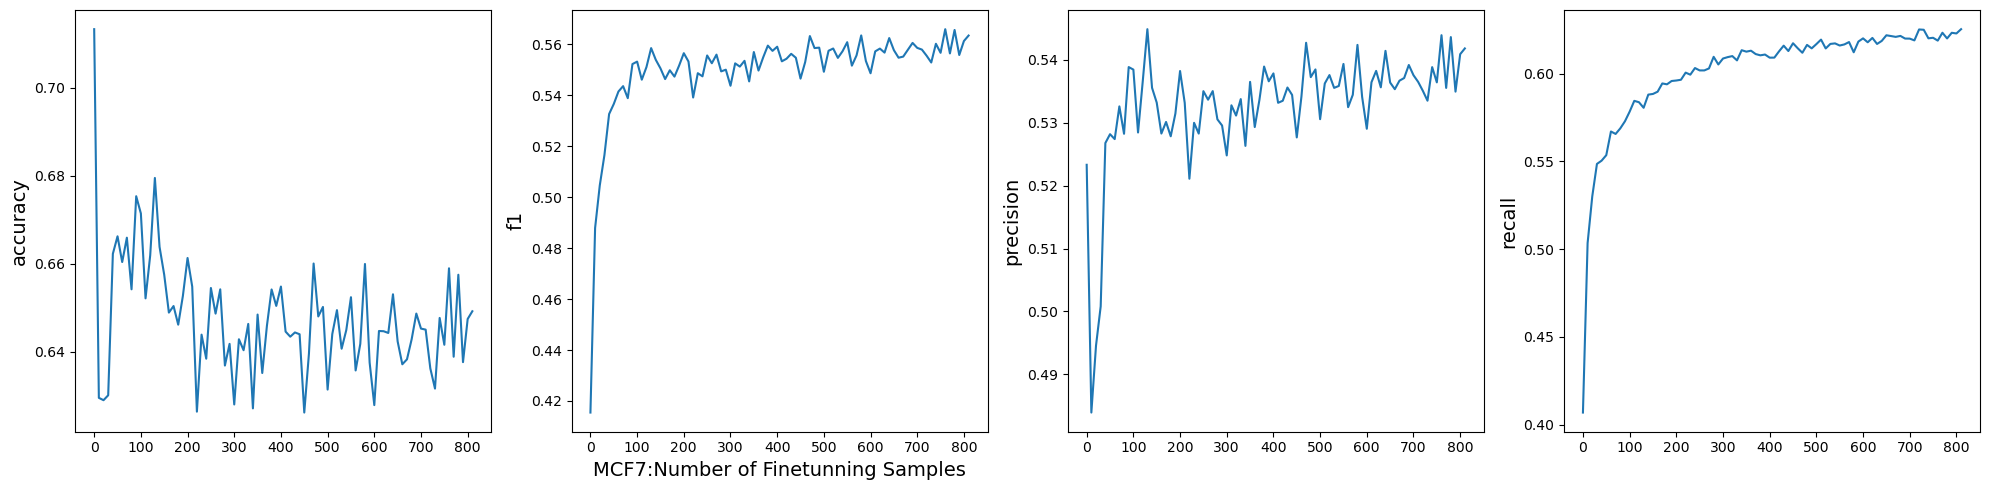

In [4]:
cell = 'MCF7'
# round_num = 28
round_num = 82
repeat_time = 3

f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)

fc = [f for f in files if cell in f]

for f in fc:
    print(f)
    pred_data = f'{rootdir}/preds/{expname}/{f}'
    a,b,c,d,f_ = readfile(pred_data)
    f1 += a
    precision += b
    recall += c
    accuracy += d
    
f1 /= repeat_time
precision /= repeat_time
recall /= repeat_time
accuracy /= repeat_time

x_mcf7, f1_mcf7 = [x*10 for x in range(round_num)], np.mean(f1, axis=0)
plotfile(f1, precision, recall, accuracy, cell)

## A549

LINCS_A549_RandomSampling_10_0_642_20240731_183253__2.csv
LINCS_A549_RandomSampling_10_0_642_20240731_183253__0.csv
LINCS_A549_RandomSampling_10_0_642_20240731_183253__1.csv


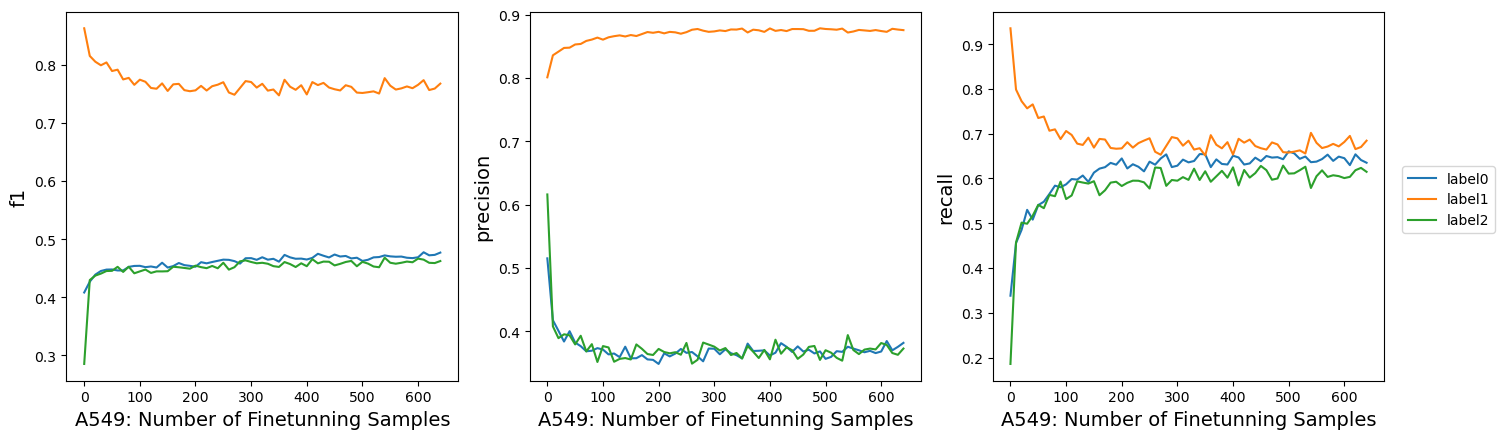

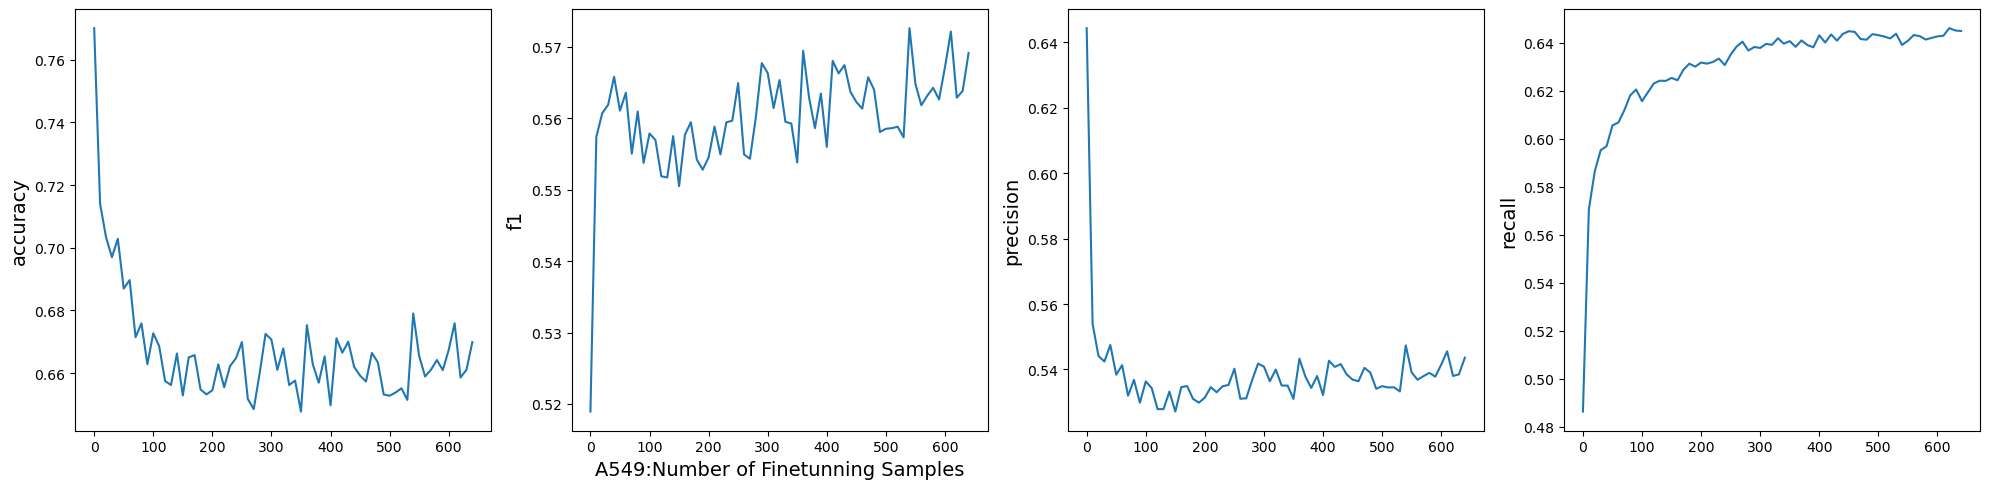

In [6]:
cell = 'A549'
round_num = 65
font = 14
repeat = 3

f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)

fc = [f for f in files if cell in f]

for f in fc:
    print(f)
    pred_data = f'{rootdir}/preds/{expname}/{f}'
    a,b,c,d,f_ = readfile(pred_data)
    f1 += a
    precision += b
    recall += c
    accuracy += d
    
f1 /= repeat_time
precision /= repeat_time
recall /= repeat_time
accuracy /= repeat_time

x_a549, f1_a549 = [x*10 for x in range(round_num)], np.mean(f1, axis=0)
plotfile(f1, precision, recall, accuracy, cell)


## PC3

LINCS_PC3_RandomSampling_10_0_957_20240731_183253__0.csv
LINCS_PC3_RandomSampling_10_0_957_20240731_183253__1.csv
LINCS_PC3_RandomSampling_10_0_957_20240731_183253__2.csv


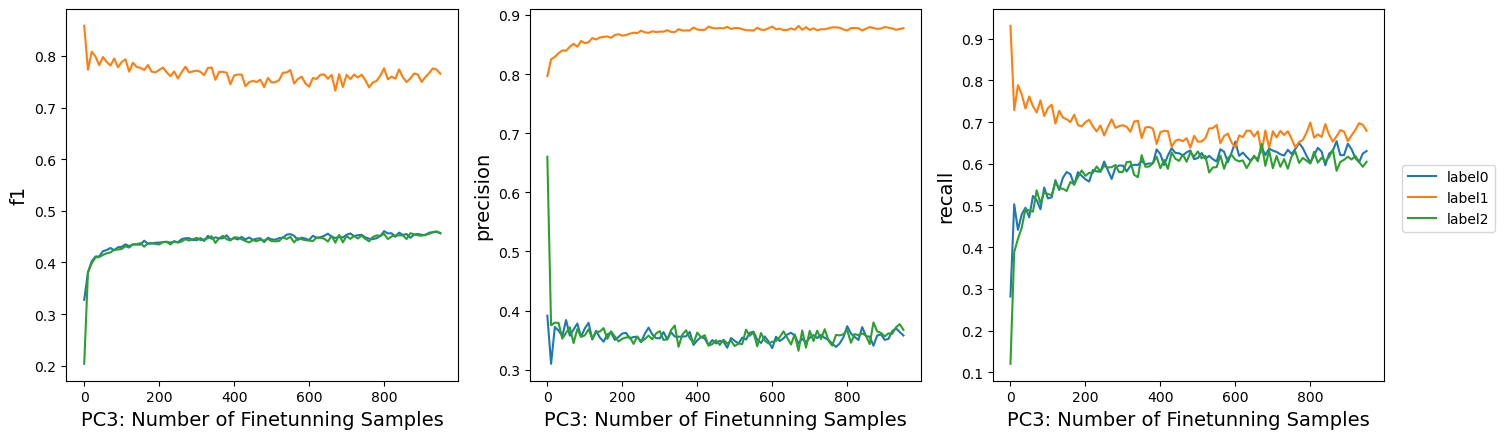

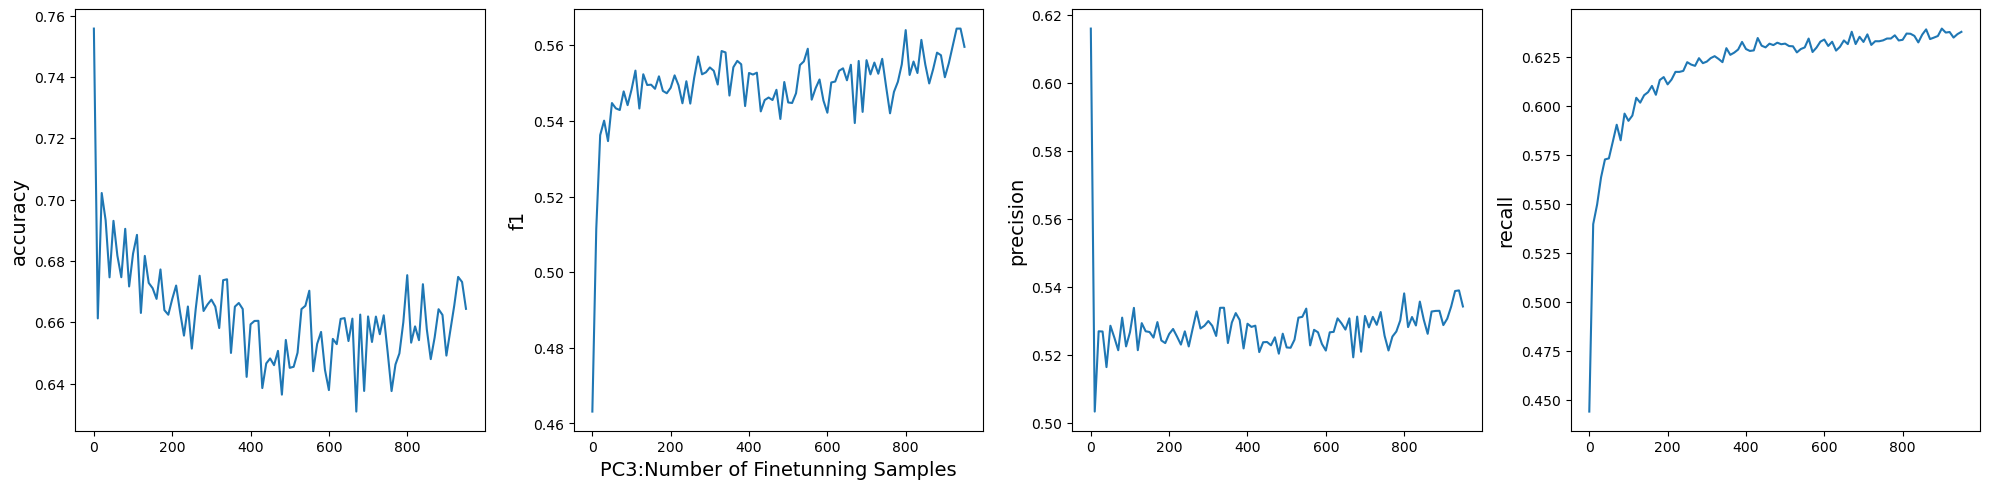

In [8]:
cell = 'PC3'
round_num = 96
font = 14
repeat = 3

f1 = np.zeros((3,round_num))
precision = np.zeros((3,round_num))
recall = np.zeros((3,round_num))
accuracy = np.zeros(round_num)

fc = [f for f in files if cell in f]

for f in fc:
    print(f)
    pred_data = f'{rootdir}/preds/{expname}/{f}'
    a,b,c,d,f_ = readfile(pred_data)
    f1 += a
    precision += b
    recall += c
    accuracy += d
    
f1 /= repeat_time
precision /= repeat_time
recall /= repeat_time
accuracy /= repeat_time

x_pc3, f1_pc3 = [x*10 for x in range(round_num)], np.mean(f1, axis=0)
plotfile(f1, precision, recall, accuracy, cell)

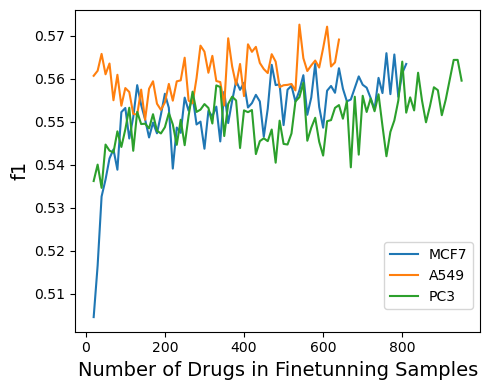

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
start = 2
ax.plot(x_mcf7[start:], f1_mcf7[start:], label='MCF7')
ax.plot(x_a549[start:], f1_a549[start:], label='A549')
ax.plot(x_pc3[start:], f1_pc3[start:], label='PC3')
ax.set_ylabel('f1', size=font)
ax.set_xlabel('Number of Drugs in Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.3))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

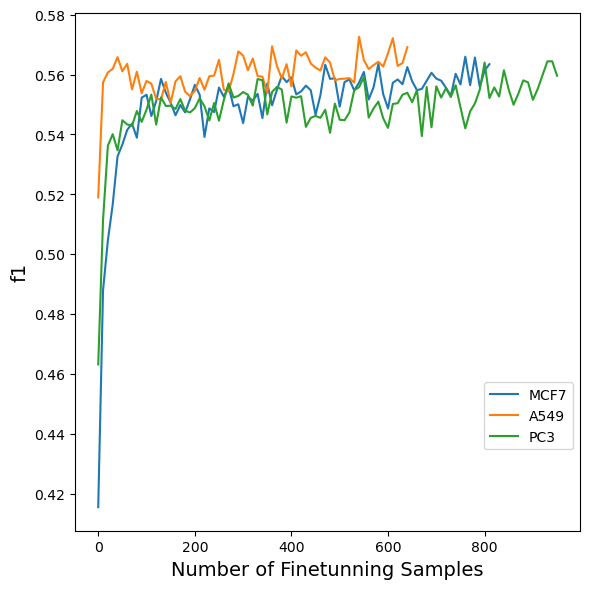

In [10]:
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(x_mcf7, f1_mcf7, label='MCF7')
ax.plot(x_a549, f1_a549, label='A549')
ax.plot(x_pc3, f1_pc3, label='PC3')
ax.set_ylabel('f1', size=font)
ax.set_xlabel('Number of Finetunning Samples', size=font)
plt.legend(bbox_to_anchor=(1.0, 0.3))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()